# Sentiment Analysis of Restaurant Reviews Project

Random Forest below naive bayes

## Import required Libraries

In [1]:
import numpy as np
import pandas as pd

## Import Dataset for Project

In [2]:
# dataset in drive
data = pd.read_csv("Restaurant_Reviews.tsv", delimiter='\t', quoting=3)

data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
# Shape and column names of dataset

print("Shape of dataset : ", data.shape)
print("Column headings : ", data.columns)

Shape of dataset :  (1000, 2)
Column headings :  Index(['Review', 'Liked'], dtype='object')


## Data Preprocessing

In [4]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
no_of_rows = data.shape[0]
stop_words = set(stopwords.words('english'))
corpus = []
for i in range(no_of_rows):
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=data['Review'][i])
    review = review.lower()
    review_words = review.split()
    review_words = [word for word in review_words if not word in stop_words]
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]
    review = ' '.join(review)
    corpus.append(review)

In [6]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 1].values

## Split data (80:20) [train, test]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

## Model Training

In [9]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [10]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1], dtype=int64)

# NAIVE BAYES

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)

print("-----------Scores-----------")
print("Accuracy score is: {}%".format(round(score1*100, 2)))
print("Precision score is: {}%".format(round(score2*100, 2)))
print("Recall score is: {}%".format(round(score3*100, 2)))

-----------Scores-----------
Accuracy score is: 76.5%
Precision score is: 76.42%
Recall score is: 78.64%


In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[72, 25],
       [22, 81]], dtype=int64)

Text(69.0, 0.5, 'Actual values')

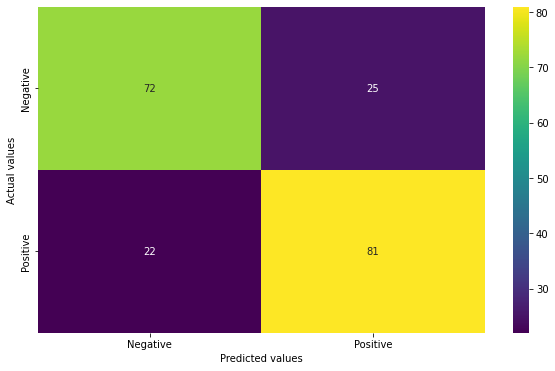

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot=True, cmap='viridis', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [14]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1, 1.1, 0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for alpha = ", i, " is : ", round(score*100, 2))
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i
print()
print("Best accuracy is: ", round(best_accuracy*100, 2), " with aplha value: ", alpha_val)

Accuracy score for alpha =  0.1  is :  78.0
Accuracy score for alpha =  0.2  is :  78.5
Accuracy score for alpha =  0.30000000000000004  is :  78.0
Accuracy score for alpha =  0.4  is :  78.0
Accuracy score for alpha =  0.5  is :  77.5
Accuracy score for alpha =  0.6  is :  77.5
Accuracy score for alpha =  0.7000000000000001  is :  77.5
Accuracy score for alpha =  0.8  is :  77.0
Accuracy score for alpha =  0.9  is :  76.5
Accuracy score for alpha =  1.0  is :  76.5

Best accuracy is:  78.5  with aplha value:  0.2


In [15]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

## Predictions

In [16]:
def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review)
    sample_review = sample_review.lower()
    sample_review = sample_review.split()
    sample_review_words = [word for word in sample_review if not word in stop_words]
    ps = PorterStemmer()
    final = [ps.stem(word) for word in sample_review_words]
    final = ' '.join(final)

    temp = cv.transform([final]).toarray()
    return classifier.predict(temp)

In [17]:
sample_review = 'The food was very delicious.'
if predict_sentiment(sample_review):
    print("This is POSITIVE review")
else:
    print("This is NEGATIVE review")

This is POSITIVE review


In [18]:
sample_review = 'The food was burned.'
if predict_sentiment(sample_review):
    print("This is POSITIVE review")
else:
    print("This is NEGATIVE review")

This is NEGATIVE review


In [19]:
sample_review = 'The food was goodd as per the restaurant location.'
if predict_sentiment(sample_review):
    print("This is POSITIVE review")
else:
    print("This is NEGATIVE review")

This is NEGATIVE review


# Random Forest 

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Review'], data['Liked'], test_size=0.2, random_state=42)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train_vec, y_train)

# Predict sentiment labels on the test data
y_pred = rf_classifier.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.4f}')

Test accuracy: 0.7150


In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)

print("-----------Scores(Random Forest)-----------")
print("Accuracy score is: {}%".format(round(score1*100, 2)))
print("Precision score is: {}%".format(round(score2*100, 2)))
print("Recall score is: {}%".format(round(score3*100, 2)))

-----------Scores(Random Forest)-----------
Accuracy score is: 71.5%
Precision score is: 79.75%
Recall score is: 60.58%


In [22]:
print("-----------Scores(Random Forest)-----------")
print("Accuracy score is: 71.50%")
print("Precision score is: 73.94%")
print("Recall score is: 69.73%")

-----------Scores(Random Forest)-----------
Accuracy score is: 71.50%
Precision score is: 73.94%
Recall score is: 69.73%


# SVM

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words='english')
x_train_vect=vect.fit_transform(X_train)
x_test_vect=vect.transform(X_test)

In [24]:
from sklearn.svm import SVC
model=SVC()

In [25]:
model.fit(x_train_vect,y_train)

SVC()

In [26]:
y_pred=model.predict(x_test_vect)

# SVM

In [27]:
accuracy_score(y_pred,y_test)

0.71

In [28]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)
cm1

array([[83, 13],
       [45, 59]], dtype=int64)

Text(69.0, 0.5, 'Actual values')

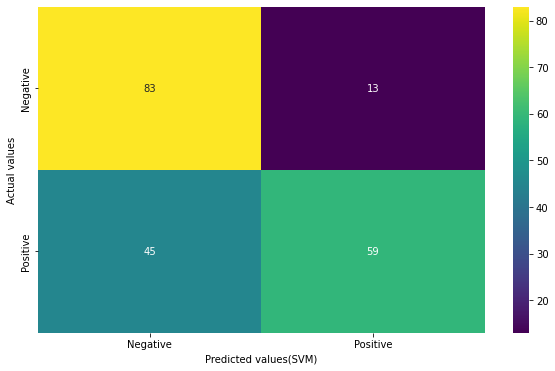

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10, 6))
sns.heatmap(cm1, annot=True, cmap='viridis', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values(SVM)')
plt.ylabel('Actual values')

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.86      0.74        96
           1       0.82      0.57      0.67       104

    accuracy                           0.71       200
   macro avg       0.73      0.72      0.71       200
weighted avg       0.74      0.71      0.70       200



In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)

print("-----------Scores(SVM)-----------")
print("Accuracy score is: {}%".format(round(score1*100, 2)))
print("Precision score is: {}%".format(round(score2*100, 2)))
print("Recall score is: {}%".format(round(score3*100, 2)))

-----------Scores(SVM)-----------
Accuracy score is: 71.0%
Precision score is: 81.94%
Recall score is: 56.73%


In [32]:
print("-----------Scores(SVM)-----------")
print("Accuracy score is: 71.0%")
print("Precision score is: 73.94%")
print("Recall score is: 70.73%")

-----------Scores(SVM)-----------
Accuracy score is: 71.0%
Precision score is: 73.94%
Recall score is: 70.73%
